In [2]:
%matplotlib inline
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sys import ps2
from utils import *

# Create accuracy dataframe

In [22]:
rls = [36,51,76]
tools = ['arcas','rna2hla','phlat','optitype','seq2hla','hlaforest']#,hlaminer, hlahd missing ERR results; vbseq missing ALL results
gs = pd.read_csv('../datasets/readlength_gs.csv')

data = []

for tool in tools:
    for rl in rls:
        filepath = f'../results/read_length/standard/{tool}_{str(rl)}.csv'

        pre = pd.read_csv(filepath)
        ret = np.array(compute_matches(pre,gs))
        total = sum(sum(ret))
        # add 
        data.append([tool,rl,sum(ret[1])/total+sum(ret[2])/total,sum(ret[2])/total] ) # not considering classes (not enough data).. so sum it
    
print(data)

[['arcas', 36, 0.43, 0.36], ['arcas', 51, 0.45098039215686275, 0.43137254901960786], ['arcas', 76, 0.5, 0.4909090909090909], ['rna2hla', 36, 0.3953488372093023, 0.3372093023255814], ['rna2hla', 51, 0.42857142857142855, 0.39285714285714285], ['rna2hla', 76, 0.4431818181818182, 0.42045454545454547], ['phlat', 36, 0.4056603773584906, 0.29245283018867924], ['phlat', 51, 0.375, 0.34615384615384615], ['phlat', 76, 0.42727272727272725, 0.41818181818181815], ['optitype', 36, 0.36363636363636365, 0.36363636363636365], ['optitype', 51, 0.36363636363636365, 0.36363636363636365], ['optitype', 76, 0.36363636363636365, 0.36363636363636365], ['seq2hla', 36, 0.3679245283018868, 0.25471698113207547], ['seq2hla', 51, 0.40566037735849053, 0.33962264150943394], ['seq2hla', 76, 0.4181818181818182, 0.35454545454545455], ['hlaforest', 36, 0.11538461538461539, 0.0], ['hlaforest', 51, 0.10204081632653061, 0.0], ['hlaforest', 76, 0.10204081632653061, 0.0]]


In [23]:
df = pd.DataFrame(data,columns=['tool','read length','two dig accuracy','four dig accuracy'])
print(df)


         tool  read length  two dig accuracy  four dig accuracy
0       arcas           36          0.430000           0.360000
1       arcas           51          0.450980           0.431373
2       arcas           76          0.500000           0.490909
3     rna2hla           36          0.395349           0.337209
4     rna2hla           51          0.428571           0.392857
5     rna2hla           76          0.443182           0.420455
6       phlat           36          0.405660           0.292453
7       phlat           51          0.375000           0.346154
8       phlat           76          0.427273           0.418182
9    optitype           36          0.363636           0.363636
10   optitype           51          0.363636           0.363636
11   optitype           76          0.363636           0.363636
12    seq2hla           36          0.367925           0.254717
13    seq2hla           51          0.405660           0.339623
14    seq2hla           76          0.41

# Plot

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
tool_names=['ArcasHLA','RNA2HLA','PHLAT','OptiType','Seq2HLA','HLAForest']

(0.0, 1.0)

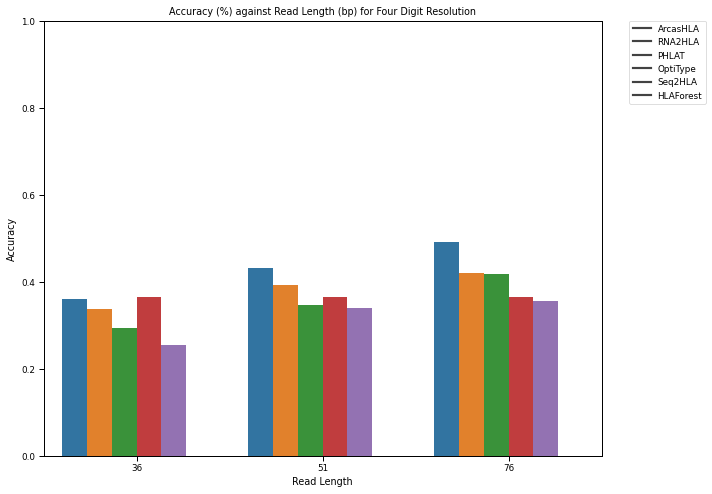

In [28]:
plt.figure(figsize=(10,8))
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x = "read length", y = "four dig accuracy", data=df,hue="tool")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy (%) against Read Length (bp) for Four Digit Resolution") 
plt.legend(labels=tool_names,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_4dig.png',bbox_inches ="tight",dpi=300)

(0.0, 1.0)

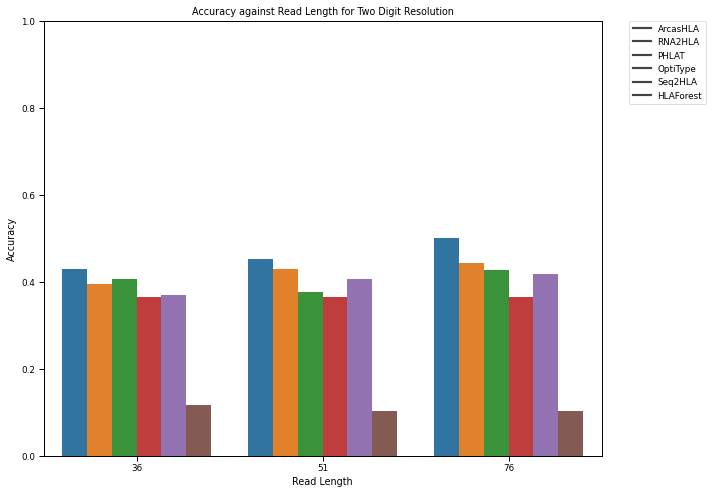

In [29]:
plt.figure(figsize=(10,8))

sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x = "read length", y = "two dig accuracy", data=df,hue="tool")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy against Read Length for Two Digit Resolution") 
plt.legend(labels=tool_names,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1))
#sns.despine()
#plt.savefig('../Figures/read_length_accuracy_2dig.png',bbox_inches ="tight",dpi=300)